# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


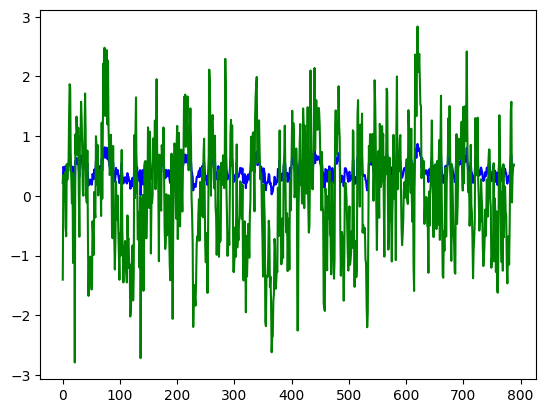

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Aggregations: temperature, precipitation, both

## temperature

### full data

In [4]:
import glob
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'
filenames = glob.glob(path + "/*.csv")

df = []
for file in filenames:
    df.append(pd.read_csv(file))
    
df = pd.concat(df, ignore_index=True)
print(min(df.x),max(df.x),min(df.y),max(df.y))
df

6.649860364384157 12.949860339180924 43.74986055078544 46.54986054189981


,date,y,x,year,week,cyclostationary_mean_tg,cyclostationary_mean_rr,cyclostationary_mean_tg_1w,cyclostationary_mean_tg_4w,cyclostationary_mean_tg_8w,cyclostationary_mean_tg_12w,cyclostationary_mean_tg_16w,cyclostationary_mean_tg_24w,cyclostationary_mean_rr_1w,cyclostationary_mean_rr_4w,cyclostationary_mean_rr_8w,cyclostationary_mean_rr_12w,cyclostationary_mean_rr_16w,cyclostationary_mean_rr_24w
0,2001-01-05,43.749861,12.14986,2001,1,2.009904,3.832692,2.009904,2.009904,2.009904,2.009904,2.009904,2.009904,3.832692,3.832692,3.832692,3.832692,3.832692,3.832692
1,2001-01-05,43.749861,12.24986,2001,1,2.067019,5.870192,2.067019,2.067019,2.067019,2.067019,2.067019,2.067019,5.870192,5.870192,5.870192,5.870192,5.870192,5.870192
2,2001-01-05,43.749861,12.34986,2001,1,1.852115,6.747115,1.852115,1.852115,1.852115,1.852115,1.852115,1.852115,6.747115,6.747115,6.747115,6.747115,6.747115,6.747115
3,2001-01-05,43.749861,12.44986,2001,1,1.326058,6.315385,1.326058,1.326058,1.326058,1.326058,1.326058,1.326058,6.315385,6.315385,6.315385,6.315385,6.315385,6.315385
4,2001-01-05,43.749861,12.54986,2001,1,0.919712,5.876923,0.919712,0.919712,0.919712,0.919712,0.919712,0.919712,5.876923,5.876923,5.876923,5.876923,5.876923,5.876923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972166,2022-06-24,45.149861,9.94986,2022,25,2.690385,-2.800962,2.272010,2.329204,1.385630,0.870501,1.147244,0.936656,-1.272072,-1.413951,-1.272724,-1.360520,-1.324643,-1.008920
972167,2022-06-24,45.149861,10.04986,2022,25,3.044231,-2.908654,2.598934,2.706495,1.759349,1.269219,1.527790,1.217671,-1.620804,-1.550787,-1.354406,-1.371571,-1.327258,-1.002166
972168,2022-06-24,45.249861,9.54986,2022,25,3.776635,-1.676923,3.400022,3.327979,2.531039,1.964117,2.186415,1.916099,-0.938462,-1.116958,-1.169462,-1.253882,-1.240283,-1.040775
972169,2022-06-24,45.249861,9.84986,2022,25,3.044519,-2.306731,2.604873,2.643358,1.767176,1.255820,1.511847,1.283886,-1.231774,-1.335385,-1.283196,-1.366569,-1.330153,-1.049503


In [5]:
df.columns

Index(['date', 'y', 'x', 'year', 'week', 'cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],
      dtype='object')

In [6]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],
                                                                   target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)




target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 180

Number of features: 991

Number of aggregated features: 216

Number of features: 991

Number of aggregated fe

Full aggregate regression train score: 1.0, test score: -69.53631274276981
Aggregate regression train score with FS: 0.39117606064681865, test score: 0.014881829106284994


In [7]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 1.0, test score: -69.53631274276981
Aggregate regression train score with FS: 0.2192675533321713, test score: 0.027839054596092483
Full aggregate regression train score: 1.0, test score: -69.53631274276981
Aggregate regression train score with FS: 0.25135063352881926, test score: 0.003212670872834944


### not considering last years

In [8]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 229

Number of features: 991

Number of aggregated features: 205

Number of features: 991

Number of aggregated fe

Full aggregate regression train score: 1.0, test score: -51.44762250888424
Aggregate regression train score with FS: 0.44994572097873853, test score: -0.08496712304409426


In [9]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 1.0, test score: -51.44762250888424
Aggregate regression train score with FS: 0.26531393105257217, test score: 0.22979342843434458
Full aggregate regression train score: 1.0, test score: -51.44762250888424
Aggregate regression train score with FS: 0.32616952006771316, test score: -0.006308092464552217


### repeat both with CMI FS

In [10]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 180

Number of features: 991

Number of aggregated features: 216

Number of features: 991

Number of aggregated fe

CMI: 0.0025039627027857725
CMI: 0.0033984315374820384
CMI: 0.0011999324124709332
CMI: 0.008935493647190679
CMI: 0.0021719712816771486
CMI: 0.004519128241721848
CMI: 0.0010273013019918564
CMI: 0.0022461622531806114
CMI: 0.002659943996411923
CMI: 0.00761679404309068
CMI: 0.0028964810479176484
CMI: 0.006342873776733343
CMI: 0.0026417613103132676
CMI: 0.0017959639818052597
CMI: 0.0003817252537612059
CMI: 0.0007062877010758917
CMI: 0.006835729931221973
CMI: 0.0028296840439015203
CMI: 0.005506855117122789
CMI: 0.014499492554886667
CMI: 0.005131186692523604
CMI: 0.009736164026371202
CMI: 0.01283395255584871
CMI: 0.01090575003203939
CMI: 0.003900821171724217
CMI: 0.014830269142751262
CMI: 0.027365681921080798
CMI: 0.008984170957556797
CMI: 0.021053429948568958
CMI: 0.0001815796639930145
CMI: 0.009972201683446452
CMI: 0.005539013732676096
CMI: 0.0029874291756611104
CMI: 0.016050440887734496
CMI: 0.0012592043406285947
CMI: 0.002766607158741663
CMI: 0.002790748465681364
CMI: 0.008530514219924706


CMI: 0.00198385626720618
CMI: 0.004737527475588782
CMI: 0.011222655403449827
CMI: 0.0004903568338169573
CMI: 0.0070203132114605715
CMI: 0.0027980344050903827
CMI: 0.0009900405200740925
CMI: 0.010889651112128501
CMI: 0.000145428758616728
CMI: 0.004156933705848742
CMI: 0.002424388414512285
CMI: 0.005298888409429048
CMI: 0.011520791331712604
CMI: 0.007617740235603354
CMI: 0.005933446351147009
CMI: 0.005770476119325796
CMI: 0.005839377361827464
CMI: 0.0039007144906625935
CMI: 0.008868852316728626
CMI: 0.0010103387126431662
CMI: 0.002872360107110755
CMI: 0.006651922532589644
CMI: 0.00023171012616438058
CMI: 0.0017096673191830392
CMI: 0.0025961594764035423
CMI: 0.002981203443499475
CMI: 0.0021020732692771105
CMI: 0.0020149989369334653
CMI: 0.005604393688218051
CMI: 0.006748512826820874
CMI: 0.0020779032333533565
CMI: 0.016751291103568322
CMI: 0.006011162279596721
CMI: 0.0010295800595170601
CMI: 0.0017956831701841092
CMI: 0.0031572347355658392
CMI: 0.009284214281647607
CMI: 0.0012385057646444

In [11]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 229

Number of features: 991

Number of aggregated features: 205

Number of features: 991

Number of aggregated fe

CMI: 0.007581066248392443
CMI: 0.00259294956229561
CMI: 0.005862725064019442
CMI: 0.005911107067163385
CMI: 0.0025408531711621496
CMI: 0.0009203110444230556
CMI: 0.016728121876010027
CMI: 0.007776180468961363
CMI: 0.015210317823608849
CMI: 0.002033181866470918
CMI: 0.0028851275957300915
CMI: 0.005105412225662714
CMI: 0.001931458623699811
CMI: 0.012831497827944072
CMI: 0.0018672415579533974
CMI: 0.0008808221722419185
CMI: 0.00456633905965767
CMI: 0.005901549665720596
CMI: 0.00181156079275549
CMI: 0.0038302811707590645
CMI: 0.006513121499850422
CMI: 0.0006884247476606487
CMI: 0.00235623971657839
CMI: 0.01754111654064852
CMI: 0.004721412762875327
CMI: 0.002570479393297548
CMI: 0.004894144595305516
CMI: 0.0011050258545218794
CMI: 0.0007980243249542107
CMI: 0.0017526871146394396
CMI: 0.0032452977244586123
CMI: 0.017984143638572536
CMI: 0.005844616638041394
CMI: 0.010366275717720141
CMI: 0.005535732985671976
CMI: 0.02262387121820786
CMI: 0.02389344410231317
CMI: 0.011688669929711515
CMI: 0.0

CMI: 0.00014295446289946945
CMI: 0.00857078444968462
CMI: 0.02140603603234134
CMI: 0.002302266202164366
CMI: 0.009746155769449177
CMI: 0.02941939089375953
CMI: 0.02114065720626332
CMI: 0.0026103358075823535
CMI: 0.005064445589847255
CMI: 0.004670621315274348
CMI: 0.0008569215549746878
CMI: 0.0006809835725066493
CMI: 0.004192217184665031
CMI: 0.0011795484651499488
CMI: 0.0045258065108087775
CMI: 0.017566329435300676
CMI: 0.0019178147986020078
CMI: 0.0013317105065113466
CMI: 0.0009206067291026854
CMI: 0.00029838204324303397
CMI: 0.0006902544522994769
CMI: 0.0021058147054895393
CMI: 0.00601574333149571
CMI: 0.00855973809586541
CMI: 0.0055594692239472054
CMI: 0.002028496121992157
CMI: 0.020800592497925208
CMI: 0.005448549389531487
CMI: 0.007398885879034367
CMI: 0.0033569935444600907
CMI: 0.013091753583872795
CMI: 0.0015606025218442843
CMI: 0.005177411168088092
CMI: 0.002694592951654584
CMI: 0.004500666291434724
CMI: 0.021286815115155983
CMI: 0.004384957967204006
CMI: 0.0005830910271978629


CMI: 0.0006853909699204852
Highest CMI score: 0.0017021927870480846
Adding original feature: 1304
CMI: 5.42460577090953e-05
CMI: 5.2296420093023155e-05
CMI: 0.000369585307601894
Highest CMI score: 0.000369585307601894
Adding original feature: 1312
CMI: 1.9294665304869785e-05
Highest CMI score: 1.9294665304869785e-05
Adding original feature: 1309
Highest CMI score: -2.1911983877354047e-07

[73, 1225, 1180, 1325, 1243, 1157, 1249, 1320, 1270, 1226, 1281, 1220, 1302, 1280, 1304, 1312, 1309]

Full aggregate regression train score: 1.0, test score: -51.44762250888424
Aggregate regression train score with FS: 0.29782427645529375, test score: -0.3843898482120256


## precipitation

### full data

In [13]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],
                                                                   target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 73

Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 143

Number of features: 991

Number of aggregated fea

Full aggregate regression train score: 1.0, test score: -107.26002859201914
Aggregate regression train score with FS: 0.3916699659246783, test score: 0.04365991648529344


In [14]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 1.0, test score: -107.26002859201914
Aggregate regression train score with FS: 0.2433097157679467, test score: 0.16899565825640073
Full aggregate regression train score: 1.0, test score: -107.26002859201914
Aggregate regression train score with FS: 0.2930576988553535, test score: 0.17524317535182943


### not considering last years

In [15]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 73

Number of features: 991

Number of aggregated features: 124

Number of features: 991

Number of aggregated features: 128

Number of features: 991

Number of aggregated fea

Full aggregate regression train score: 1.0, test score: -50.090075247160705
Aggregate regression train score with FS: 0.4150490687257089, test score: -0.1867729935628446


In [16]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 1.0, test score: -50.090075247160705
Aggregate regression train score with FS: 0.254065285655218, test score: 0.1215786055850685
Full aggregate regression train score: 1.0, test score: -50.090075247160705
Aggregate regression train score with FS: 0.28831796493724104, test score: 0.008303924539712293


### repeat both with CMI FS

In [17]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 73

Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 143

Number of features: 991

Number of aggregated fea

CMI: 0.007090375476627775
CMI: 0.011458104704068689
CMI: 0.010419530263854532
CMI: 0.0038104151048925783
CMI: 0.00152885965031338
CMI: 0.008020120009678944
CMI: 0.027412543309498966
CMI: 0.0013285965617683138
CMI: 0.00214846969145277
CMI: 0.024159938936485492
CMI: 0.03345528861291444
CMI: 0.029399855535228975
CMI: 0.014082740915422526
CMI: 0.004288000867833902
CMI: 0.02568338070966314
CMI: 0.024140320868974274
CMI: 0.020945861409514516
CMI: 0.0015088018337362508
CMI: 0.0134014049618702
CMI: 0.0268807618128227
CMI: 0.01479924905694291
CMI: 0.008463409399154215
CMI: 0.020488158454388172
CMI: 0.011143066494086834
CMI: 0.0222733591767717
CMI: 0.02323142160783437
CMI: 0.03371621756336493
CMI: 0.021712570372509593
CMI: 0.02920408607060987
CMI: 0.008925539668290738
CMI: 0.002203904623751418
CMI: 0.03093201710619256
CMI: 0.028815492768700463
CMI: 0.01010535318882394
CMI: 0.018098706185247088
CMI: 0.025524969530783648
CMI: 0.04479105205431089
CMI: 0.03394008175581764
CMI: 0.023849114735024685
C

CMI: 0.025353500660952183
CMI: 0.008024049181068332
CMI: 0.00026905133832919037
CMI: 0.02424529888335411
CMI: 0.019260975361986815
CMI: 0.0055396903519976115
CMI: 0.010280279032362616
CMI: 0.013119932158501185
CMI: 0.0046831360083472995
CMI: 0.02968677750135404
CMI: 0.01978600195280919
CMI: 0.008456214834220821
CMI: 0.021315786913549933
CMI: 0.020347119589852913
CMI: 0.010260661096857804
CMI: 0.021805299629776648
CMI: 0.00897454868917158
CMI: 0.017473530276273325
CMI: 0.014613860075267548
CMI: 0.011897452431726685
CMI: 0.014392802664922377
CMI: 0.007244613258934746
CMI: 0.005545758928175326
CMI: 0.013069783699455967
CMI: 0.010921510360889758
CMI: 0.02031935436772489
CMI: 0.0008102787702476966
CMI: 0.007431080128839224
CMI: 0.03496124174354104
CMI: 0.025875486572891432
CMI: 0.021775001549445866
CMI: 0.008178157212422182
CMI: 0.01778616266962285
CMI: 0.024080476211182505
CMI: 0.01101170906891169
CMI: 0.012751898996692296
CMI: 0.01834774415491483
CMI: 0.0005089227695715126
CMI: 0.02182230

CMI: 0.012459875245705715
CMI: 0.005593644393978525
CMI: 0.010660537660978575
CMI: 0.0021096301855399735
CMI: 0.0127681467785839
CMI: 8.578385183721782e-05
CMI: 0.002330248906887239
CMI: 0.004797866068174478
CMI: 0.0027880878373790496
CMI: 0.002940723928918587
CMI: 0.0041384451633446895
CMI: 0.002919955659483303
CMI: 0.00246984751509971
CMI: 0.0010325834336750717
CMI: 0.0014934422683774429
CMI: 0.0067231749277546216
CMI: 0.011121540429893856
CMI: 0.0030921342464611257
CMI: 0.0009515899129515504
CMI: 0.0014358232995782816
CMI: 0.0022288245006142626
CMI: 0.0020942289863028485
CMI: 0.00015919002270736726
CMI: 0.005051083907765985
Highest CMI score: 0.013692408620699204
Adding original feature: 422
CMI: 0.0013855528521723726
CMI: 0.0034582674107210554
CMI: 0.003041778858979771
CMI: 0.007758948957745232
CMI: 0.0046456537263075415
CMI: 0.0021652038767726034
CMI: 0.006353852969256307
CMI: 0.0037400751816017985
CMI: 0.0025315343817470803
CMI: 0.00024895853492981623
CMI: 0.0006129025047641734
C

In [18]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 73

Number of features: 991

Number of aggregated features: 124

Number of features: 991

Number of aggregated features: 128

Number of features: 991

Number of aggregated fea

CMI: 0.003021143640502766
CMI: 0.000967829597963682
CMI: 0.000890110104918268
CMI: 0.010490925627996028
CMI: 0.006678903299446842
CMI: 0.005939431389266003
CMI: 0.011220118135843699
CMI: 0.003821774366949887
CMI: 0.015618156660269222
CMI: 0.03582635172350354
CMI: 0.03338069377193251
CMI: 0.0007588746905982935
CMI: 0.025104803669152298
CMI: 0.002004748133929868
CMI: 0.027085231296542223
CMI: 0.026370892359408676
CMI: 0.0004747614150238111
CMI: 0.015689386222831614
CMI: 0.027370452052224215
CMI: 0.01604499341022439
CMI: 0.01119670678998469
CMI: 0.024506015429892947
CMI: 0.019539673112788175
CMI: 0.0070385423686060156
CMI: 0.018554309492592985
CMI: 0.010537275495301285
CMI: 0.023570798301787488
CMI: 0.014503759370446928
CMI: 0.029325633340050172
CMI: 0.004481395103191427
CMI: 0.03008658646004997
CMI: 0.00230995651100796
CMI: 0.011284331002511389
CMI: 0.023539581878206622
CMI: 0.010791018092070476
CMI: 0.008690524295825508
CMI: 0.00969437999835418
CMI: 0.00817481076267551
CMI: 0.0135277603

CMI: 0.002148257017411559
CMI: 0.0019373386838213436
CMI: 0.0032043933278768366
CMI: 0.0064001758344074955
CMI: 0.0003791665002360889
CMI: 0.004535437563922634
CMI: 0.003949228400285748
CMI: 0.007888775004735143
CMI: 0.011901106190492422
CMI: 0.0174062076947184
CMI: 0.0058620843128623645
CMI: 0.013896592672583474
CMI: 0.001678669855633086
CMI: 0.00016700886326392883
CMI: 0.0007432695617177465
CMI: 0.012805060730877088
CMI: 0.007760289617540939
CMI: 0.0012976616598994184
CMI: 0.018201860682445004
CMI: 0.0038213008488092726
CMI: 0.00016720431588260198
CMI: 0.0039522392076050405
CMI: 0.0037278768545443153
CMI: 0.013046180978334876
CMI: 3.950153834780812e-05
CMI: 0.002851657608119701
CMI: 0.012337439233806952
CMI: 0.011878129995564923
CMI: 0.004115312045408881
CMI: 0.005916756482594321
CMI: 0.003581830004919656
CMI: 0.008957610979606873
CMI: 0.008532571990331
CMI: 0.0008703553896153016
CMI: 0.020667767051271962
CMI: 0.010960177758697232
CMI: 0.0022736891735875564
CMI: 0.0016723206195785878

## both

### full data

In [20]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],
                                                                   target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 180

Number of features: 991

Number of aggregated features: 216

Number of features: 991

Number of aggregated fe

Full aggregate regression train score: 1.0, test score: -10.25644855698291
Aggregate regression train score with FS: 0.43691671886989203, test score: 0.013714648428649334


In [21]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 1.0, test score: -10.25644855698291
Aggregate regression train score with FS: 0.2989843881600053, test score: 0.008229161108555538
Full aggregate regression train score: 1.0, test score: -10.25644855698291
Aggregate regression train score with FS: 0.3575592125346555, test score: 0.05487517934620911


### not considering last years

In [22]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 229

Number of features: 991

Number of aggregated features: 205

Number of features: 991

Number of aggregated fe

Full aggregate regression train score: 1.0, test score: -47.04441691436805
Aggregate regression train score with FS: 0.4407605870892173, test score: -1.4970648109634883


In [23]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 1.0, test score: -47.04441691436805
Aggregate regression train score with FS: 0.3022136485958721, test score: 0.15432895007832692
Full aggregate regression train score: 1.0, test score: -47.04441691436805
Aggregate regression train score with FS: 0.33596758985479447, test score: 0.19626923357244153


### repeat both with CMI FS

In [24]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 180

Number of features: 991

Number of aggregated features: 216

Number of features: 991

Number of aggregated fe

CMI: 0.0025039627027857725
CMI: 0.0033984315374820384
CMI: 0.0011999324124709332
CMI: 0.008935493647190679
CMI: 0.0021719712816771486
CMI: 0.004519128241721848
CMI: 0.0010273013019918564
CMI: 0.0022461622531806114
CMI: 0.002659943996411923
CMI: 0.00761679404309068
CMI: 0.0028964810479176484
CMI: 0.006342873776733343
CMI: 0.0026417613103132676
CMI: 0.0017959639818052597
CMI: 0.0003817252537612059
CMI: 0.0007062877010758917
CMI: 0.006835729931221973
CMI: 0.0028296840439015203
CMI: 0.005506855117122789
CMI: 0.014499492554886667
CMI: 0.005131186692523604
CMI: 0.009736164026371202
CMI: 0.01283395255584871
CMI: 0.01090575003203939
CMI: 0.003900821171724217
CMI: 0.014830269142751262
CMI: 0.027365681921080798
CMI: 0.008984170957556797
CMI: 0.021053429948568958
CMI: 0.0001815796639930145
CMI: 0.009972201683446452
CMI: 0.005539013732676096
CMI: 0.0029874291756611104
CMI: 0.016050440887734496
CMI: 0.0012592043406285947
CMI: 0.002766607158741663
CMI: 0.002790748465681364
CMI: 0.008530514219924706


CMI: 0.0017080618972968864
CMI: 0.0013827221690797253
CMI: 0.004098433863770845
CMI: 0.001299289519757857
CMI: 0.04442143517740016
CMI: 0.04705411736590234
CMI: 0.03152663854194718
CMI: 0.030728328691852796
CMI: 0.01726758204999121
CMI: 0.02732150515566928
CMI: 0.026601506070106
CMI: 0.03109011813997742
CMI: 0.01941535671069458
CMI: 0.008773744467584055
CMI: 0.014170307973434909
CMI: 0.04286356121888166
CMI: 0.021708433135370492
CMI: 0.02964254051860571
CMI: 0.031606491378266155
CMI: 0.014337853390852001
CMI: 0.0364307235363191
CMI: 0.030864131679176787
CMI: 0.014471212234793696
CMI: 0.0031147265874528485
CMI: 0.0016865701235253272
CMI: 0.035237099904730174
CMI: 0.022410678771473763
CMI: 0.012839250480653236
CMI: 0.04257369100058611
CMI: 0.04350850625317443
CMI: 0.03486409024920481
CMI: 0.02450008416937388
CMI: 0.0094557642748683
CMI: 0.009522078002954348
CMI: 0.03563821882117224
CMI: 0.0533587913397289
CMI: 0.023647605447810888
CMI: 0.01223941012474028
CMI: 0.007100206757550492
CMI: 0

CMI: 0.033639812674365416
CMI: 0.018945119495597823
CMI: 0.020382532340188275
CMI: 0.03701894182219906
CMI: 0.029860522962906033
CMI: 0.013761682024919786
CMI: 0.037766112724427314
CMI: 0.040470777326649304
CMI: 0.03394436893468561
CMI: 0.0273704159127027
CMI: 0.012689021958066066
CMI: 0.015605724154425654
CMI: 0.026309183795445862
CMI: 0.03779655278662844
CMI: 0.03614448075743312
CMI: 0.0477610653421732
CMI: 0.047910821930483516
CMI: 0.02935268400010521
CMI: 0.041273382398736264
CMI: 0.03345602246802776
CMI: 0.04591916965236764
CMI: 0.047624394198342995
CMI: 0.02944125227561828
CMI: 0.027581913187939427
CMI: 0.038386378310593605
CMI: 0.03273409939975819
CMI: 0.026524369117876867
CMI: 0.0028468678645981182
CMI: 0.03311090091081281
CMI: 0.014690627795613892
CMI: 0.008183639024159778
CMI: 0.020518818644355757
CMI: 0.040614644698536706
CMI: 0.01110332307571793
CMI: 0.00843249004570265
CMI: 0.04670991043568076
CMI: 0.034456611680480226
CMI: 0.02587080825431129
CMI: 0.015945216317815814
CMI

CMI: 9.72654647727611e-05
CMI: 0.001227329901834051
CMI: 0.008786310204689424
CMI: 0.018829275438365795
CMI: 0.028825796925240066
CMI: 0.00556907065823084
CMI: 0.0037779737648626355
CMI: 0.004352014489609979
CMI: 0.01610386249123713
Highest CMI score: 0.07277115030710579
Adding original feature: 1719
CMI: 0.0004719790343314101
CMI: 0.0057270964264408974
CMI: 0.005885898980695636
CMI: 0.0027811311307138487
CMI: 0.005852027367345941
CMI: 0.001969718458881442
CMI: 0.008408478033162164
CMI: 0.002369927757693291
CMI: 0.012548212282393195
CMI: 0.01022900023680412
CMI: 0.009924325615998014
CMI: 0.016301376121456712
CMI: 0.011686230453360924
CMI: 0.00032921950677014533
CMI: 0.005176599708252405
CMI: 0.003768694175081244
CMI: 0.006446989881432941
CMI: 0.003290948146626088
CMI: 0.013182881511237005
CMI: 0.0009940390991128867
CMI: 0.0005898299434773102
CMI: 0.004041006640121053
CMI: 0.0015878188358468548
CMI: 0.01674015262035186
CMI: 0.001631022828059936
CMI: 0.0027580850303551285
CMI: 0.00693418

CMI: 0.000459519569538519
CMI: 0.004032899452664163
CMI: 0.014587370718667253
CMI: 0.001376486614082878
CMI: 0.022421852708159662
CMI: 0.01735484682070626
CMI: 0.0017368045067703286
CMI: 0.005021051535954446
CMI: 0.0016589268786373068
CMI: 0.008846801611025218
CMI: 0.009597795724717001
CMI: 0.0069566523828087645
CMI: 0.00334980820870337
CMI: 9.844553622972985e-05
CMI: 0.0026023244145894076
CMI: 0.0016639489711849365
CMI: 0.0016724932687879612
CMI: 0.0030005118456836177
CMI: 0.008186775498337712
CMI: 0.002036220778149994
CMI: 0.00790176774925247
CMI: 0.01627151273854785
CMI: 0.011980324267870324
CMI: 0.010221629482809608
CMI: 0.002269345281783741
CMI: 0.011040228100387683
CMI: 0.005381959165072475
CMI: 0.002559561904190627
CMI: 0.0004454645462380613
CMI: 0.006766099581522217
CMI: 0.004901687417175199
CMI: 0.006212232689976976
CMI: 0.029530209238220834
CMI: 0.045740428378739845
CMI: 0.018245016056402996
CMI: 0.012398629504524833
CMI: 0.014325697718335306
CMI: 0.014345128805498736
CMI: 0.

CMI: 0.018616305347526507
CMI: 0.020719629860628974
CMI: 0.011102329649661458
CMI: 0.002943547719538475
CMI: 0.0020238729378012077
CMI: 8.769964298241395e-05
CMI: 0.006208251085704497
CMI: 0.003554766493712974
CMI: 0.0029110344037953373
CMI: 0.01996076042309336
CMI: 0.016656982724824215
CMI: 0.019054283118731197
CMI: 0.026718884855632397
CMI: 0.026464334893451458
CMI: 0.025659189820887662
CMI: 0.008060858629567125
CMI: 0.0014910479134694898
CMI: 0.0009491015795669855
CMI: 0.00447593342385616
CMI: 0.02342761547892533
CMI: 0.00023680590233587928
CMI: 0.0001656963201024375
CMI: 0.008831322815702453
CMI: 0.010215655768980592
CMI: 0.008226987736231456
CMI: 0.009270234521576964
CMI: 0.008228647838199238
CMI: 0.008696006238287507
CMI: 0.017232007089144824
CMI: 0.019242253191192743
CMI: 0.017137663748253706
CMI: 0.0033116123357082305
CMI: 0.004318297859124548
CMI: 0.009821828982912229
CMI: 0.005821446660232404
CMI: 0.0004977325170441582
CMI: 0.009530052479694323
CMI: 0.0012666519493915729
CMI:

CMI: 0.015665337594239687
CMI: 0.004394155286534779
CMI: 0.015195093923831865
CMI: 0.0031920117023114813
CMI: 0.00697877426507873
CMI: 0.0012198367922824083
CMI: 0.0005366811641904778
CMI: 0.0016638286439928374
CMI: 0.0006007184177572455
CMI: 0.006279496282472735
CMI: 0.009220998454777862
CMI: 0.021562794605944874
CMI: 0.0016531941114605597
CMI: 0.013518881964323881
CMI: 0.003140492992329963
CMI: 0.0019359139265677505
CMI: 0.02902323973412968
CMI: 0.012173865089340874
CMI: 0.0001907941854616957
CMI: 0.004491238990746882
CMI: 0.013345019492935262
CMI: 0.004352719146517164
CMI: 0.005912119335372029
CMI: 0.008770387257897583
CMI: 0.004839617237913901
CMI: 0.01617753629932156
CMI: 0.01871289365943224
CMI: 0.025025954506906672
CMI: 0.008459848712074697
CMI: 0.0068975771439392375
CMI: 1.4940435300508925e-05
CMI: 0.0024615861186448873
CMI: 0.0008618343174071064
CMI: 0.01731912477053718
CMI: 0.015740655491861932
CMI: 0.009957181114270991
CMI: 0.015616001835351612
CMI: 0.007194955752238691
CMI:

CMI: 0.002252527216601574
CMI: 0.0017762270271147185
Highest CMI score: 0.014316617420830124
Adding original feature: 2073
CMI: 0.003278749147193949
CMI: 0.0036379875593765543
CMI: 0.005777970313813829
CMI: 0.003056123072628536
CMI: 0.0007075139100590766
CMI: 0.0010591907444499338
CMI: 0.0021720400238893767
CMI: 0.004610719788902151
CMI: 0.0015378436143763663
CMI: 0.005426616312446564
CMI: 0.002734092055117321
CMI: 0.007284327432429849
CMI: 0.005401627121595254
CMI: 0.0030114965733751276
CMI: 0.006379652401680369
CMI: 0.004423951696396977
CMI: 0.004704453630402172
CMI: 0.006820331980865901
CMI: 0.00013134091461031172
CMI: 0.006535674739864605
Highest CMI score: 0.007284327432429849
Adding original feature: 1846
CMI: 0.001129763219980373
CMI: 0.002516434791972444
CMI: 0.0023506141942535863
CMI: 5.408226244929537e-05
CMI: 0.008965357105476579
Highest CMI score: 0.008965357105476579
Adding original feature: 2076
Highest CMI score: -0.0014591404996809887

[292, 1719, 2097, 687, 2073, 1846,

In [25]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 229

Number of features: 991

Number of aggregated features: 205

Number of features: 991

Number of aggregated fe

CMI: 0.014185624097265065
CMI: 0.027508646246463236
CMI: 0.005220550422118941
CMI: 0.01993198885112976
CMI: 7.074010669685937e-05
CMI: 0.0010390880109282241
CMI: 0.01750309660069499
CMI: 0.025294977579545297
CMI: 0.00013582726601743533
CMI: 0.043480942417269186
CMI: 0.04763067906204224
CMI: 0.038827730221493745
CMI: 0.043169282069760784
CMI: 0.03806306491358821
CMI: 0.025064274736372377
CMI: 0.033465538653763505
CMI: 0.025135821412883508
CMI: 0.017390034899923495
CMI: 0.019606436613077705
CMI: 0.042148643959335985
CMI: 0.04670327723504375
CMI: 0.043297085270557784
CMI: 0.04400819551742108
CMI: 0.029472242252550546
CMI: 0.018617838120211977
CMI: 0.015352158172940722
CMI: 0.0220948982007228
CMI: 0.03752812977959619
CMI: 0.0527221357072995
CMI: 0.04553613358496536
CMI: 0.028596625252407387
CMI: 0.02454124875499253
CMI: 0.04000428543652049
CMI: 0.023194386194279715
CMI: 0.028213741583067026
CMI: 0.012797698799448975
CMI: 0.02244824871337478
CMI: 0.04453605666085894
CMI: 0.03878843674988105

CMI: 0.03387238702988232
CMI: 0.028332670376412933
CMI: 0.04416325688279646
CMI: 0.052571173648488595
CMI: 0.048625514621702504
CMI: 0.01879614485398806
CMI: 0.028842254208122337
CMI: 0.033958031234181146
CMI: 0.04422189970664561
CMI: 0.020721008551891185
CMI: 0.044200523512200524
CMI: 0.02299607307311688
CMI: 0.031130172586425697
CMI: 0.046541574002144204
CMI: 0.03311136949955015
CMI: 0.029205285576650558
CMI: 0.021701327219269012
CMI: 0.018971576669767454
CMI: 0.033919405452295104
CMI: 0.030986995228619085
CMI: 0.03736014482229194
CMI: 0.018798143642323545
CMI: 0.030916457790158253
CMI: 0.010440822766816349
CMI: 0.038363566529245885
CMI: 0.0362645867311657
CMI: 0.0276304371696362
CMI: 0.04902761680711004
CMI: 0.028590455613975302
CMI: 0.027338712393849662
CMI: 0.018503260809738548
CMI: 0.030608172569723202
CMI: 0.03309161554712636
CMI: 0.025674156994614422
CMI: 0.05040492292486079
CMI: 0.04870363005819109
CMI: 0.04649349796771843
CMI: 0.04638172796892323
CMI: 0.046499200101402155
CMI

CMI: 0.0010021011388283707
CMI: 0.003288989945487736
CMI: 0.007432076545168725
CMI: 0.011023486305765967
CMI: 0.002382567628935378
CMI: 0.005715061932499599
CMI: 0.017688088553480696
CMI: 0.021318073489657474
CMI: 0.004386714834372751
CMI: 0.0023949982606889797
CMI: 0.006567837699444218
CMI: 0.016402813603732136
CMI: 0.01526115268770567
CMI: 0.0014230832610172828
CMI: 0.010592213589852822
CMI: 0.00024399190005652827
CMI: 0.012683366219860603
CMI: 0.02636441487872837
CMI: 0.020897615126615643
CMI: 0.006241946165701562
CMI: 0.0048262968760263425
CMI: 0.013131835628810956
CMI: 0.006486722716533416
CMI: 1.5350658158053143e-05
CMI: 0.001900726651951401
CMI: 0.01600357215846404
CMI: 0.017720489972536363
CMI: 0.010994104847153907
CMI: 0.014641829395990014
CMI: 0.013590567031008471
CMI: 0.0049737757522396175
CMI: 0.008475820259317535
CMI: 0.0037334922514440927
CMI: 0.005281260096785367
CMI: 0.023883510700746985
CMI: 0.008204962566565499
CMI: 0.017242449464081655
CMI: 0.019491179816361087
CMI: 